# Linear Models


## Linear Regression

: 선형 회귀는 모델의 예측과 정답 사이의 **평균제곱오차(=Mean Squared Error)**를 치소화하는 학습파라미터를 찾는다.

> **선형 회귀 모델에서 사용하는 다양한 오류 측정의 방법**
> - MAE(Mean Absoulte Error)
> - MAPE(Mean Absoulte Percentage Error)
> - MSE(Mean Squared Error)
> - MPE(Mean Percentage Error)


> **장단점**
> - 장점 : 매개변수가 없다.
> - 단점 : 모델의 복잡도를 제어할 방법이 없다.

In [10]:
import warnings
warnings.filterwarnings(action='ignore') #warnings.filterwarnings(action='default')
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
boston = load_boston()
boston_df = pd.DataFrame(data = boston.data, columns = boston.feature_names)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [11]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size = 0.2, random_state = 123)
lr = LinearRegression(normalize = True).fit(X_train, y_train)

print("train score = {:.3f}".format(lr.score(X_train, y_train)))
print("test score = {:.3f}".format(lr.score(X_test, y_test)))

train score = 0.756
test score = 0.659


### 생성된 회귀 모델에 대한 수식

> - **coef_** : 추정된 가중치 벡터 
> - **intercept_** : 추정된 상수항

In [12]:
print("y = " + str(lr.intercept_) + " ")
for i, c in enumerate(lr.coef_):
    print(str(c) + " x" + str(i))
    
# 13개의 feature에 대한 가중치의 곱으로 선형함수가 구성된다.

y = 31.83516412120641 
-0.09879316957681174 x0
0.04750271023770873 x1
0.06694918405498221 x2
1.2695414993876384 x3
-15.469774659508765 x4
4.319684124958681 x5
-0.0009801679369872837 x6
-1.3659795259243277 x7
0.28452183792127284 x8
-0.012753360613762957 x9
-0.9134875985014326 x10
0.007225535065935824 x11
-0.5437902451653297 x12


### 평가

- Regression에서는 보통 RMSE와 R2를 비교한다.

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_predict = lr.predict(X_train)
RMSE = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
R2 = r2_score(y_train, y_train_predict)

print("RMSE : {:.3f}".format(RMSE)) #  낮을수록 좋다
print("R2 score : {:.3f}".format(R2)) # 높을수록 좋다

RMSE : 4.547
R2 score : 0.756


In [14]:
y_test_predict = lr.predict(X_test)
RMSE = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
R2 = r2_score(y_test, y_test_predict)

print("RMSE : {:.3f}".format(RMSE)) #  낮을수록 좋다
print("R2 score : {:.3f}".format(R2)) # 높을수록 좋다

RMSE : 5.310
R2 score : 0.659


### 시각화

In [15]:
def plot_boston(expected, predicted):
    plt.figure(figsize = (8, 4))
    plt.scatter(expected, predicted)
    plt.plot([5, 50], [5, 50], "--r")
    plt.xlabel("True price ($1,000)")
    plt.ylabel("Predicted price($1,000)")
    plt.tight_layout()

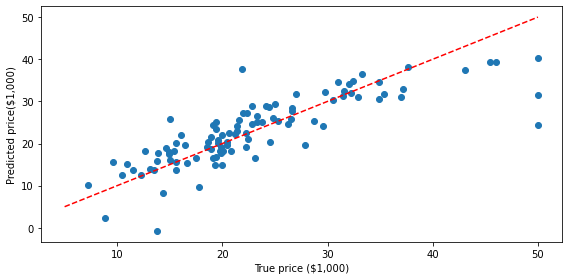

In [16]:
predicted = lr.predict(X_test)
expected = y_test

plot_boston(expected, predicted)

## Ridge Regression

: L2규제를 두어 다중공상성의 문제를 방지하기 때문에 모델의 과대적합을 막을 수 있게 된다.

> ***parameter***  
> - *alpha  
: 값이 크면 규제의 효과가 커지고, 값이 작으면 규제의 효과가 작아지게 된다.*

> ***conclusion***
>- *Ridge Regression은 가중치에 제약을 두기 때문에 Linear Regression보다 훈련데이터 점수가 낮을 수 있다.*
>- *일반화 성능은 Ridge가 더 높기 때문에 평가 데이터 점수는 Ridge 가 더 좋다.*
>- *일반화 성능에 영향을 주는 매개변수인 alpha값을 조정해 보면서 Ridge의 성능이 어떻게 변하는지 확인가능하다.*

In [17]:
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [18]:
X, y = load_boston(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

ridge = Ridge(alpha = 0.1).fit(X_train, y_train)

print("train score = {:.3f}".format(ridge.score(X_train, y_train)))
print("test score = {:.3f}".format(ridge.score(X_test, y_test)))
# LinearRegression에 비해 test score가 조금 향상됨

train score = 0.752
test score = 0.685


## Lasso Regression

: L1규제를 두어 다중공상성의 문제를 방지하기 때문에 모델의 과대적합을 막을 수 있게 된다.

> ***parameter***  
> - ***alpha***  
: *값이 크면 규제의 효과가 커지고, 값이 작으면 규제의 효과가 작아지게 된다.*


In [19]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [20]:
X, y = load_boston(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

lasso = Lasso(alpha = 0.001).fit(X_train, y_train)

print("train score = {:.3f}".format(lasso.score(X_train, y_train)))
print("test score = {:.3f}".format(lasso.score(X_test, y_test)))
# LinearRegression, RidgeRegression에 비해 test score가 조금 향상됨

train score = 0.752
test score = 0.686


## Elastic-Net

- Ridge와 Lasso의 모든 규제를 사용하는 선형 모델로, 두 모델의 장점을 갖기 때문에 좋은 성능을 보인다.
- 데이터 featrue가 많거나, 서로 상관관계가 높은 feature가 존재할 때 좋은 성능을 보인다.

> ***parameter***  
> - ***alpha***  
: *값이 크면 규제의 효과가 커지고, 값이 작으면 규제의 효과가 작아지게 된다.*
> - ***l1_ratio***  
: *라쏘 규제(L1)와 릿지 규제(L2)간의 가중치를 조절하는 역할을 수행한다.*

In [21]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [22]:
X, y = load_boston(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

elastic = ElasticNet(alpha = 0.001, l1_ratio = 0.5).fit(X_train, y_train)

print("train score = {:.3f}".format(elastic.score(X_train, y_train)))
print("test score = {:.3f}".format(elastic.score(X_test, y_test)))

train score = 0.752
test score = 0.684


## Orthogonal Matchin Pursuit

- 모델에 존재하는 가중치 벡터에 특별한 제약을 거는 방법으로 모델을 훈련시키는 과정에서 불필요한 feature을 필터링이 가능하다.

> ***parameter***  
> - ***n_nonzero_coefs***  
: *사용할 feature의 개수를 지정하여 필터링이 가능하게한다.*

In [23]:
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [24]:
X, y = load_boston(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

orthogonal = OrthogonalMatchingPursuit(n_nonzero_coefs = 7) #  13개중 7개
orthogonal.fit(X_train, y_train)

print("train score : {:.3}".format(orthogonal.score(X_train, y_train)))
print("test score : {:.3}".format(orthogonal.score(X_test, y_test)))

train score : 0.736
test score : 0.659


## Polynomial Regression

- 입력데이터를 비선형으로 변환하여 사용하는 방법으로 차수가 높아질수록 더 복잡합 데이터 학습이 가능하다.
- 모델 자체는 선형 모델이다.

In [25]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

In [26]:
X, y = load_boston(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

poly_lr = make_pipeline(
    PolynomialFeatures(degree = 2),
    StandardScaler(),
    LinearRegression()
)

poly_lr.fit(X_train, y_train)

print("train score : {:.3}".format(poly_lr.score(X_train, y_train)))
print("test score : {:.3}".format(poly_lr.score(X_test, y_test)))

train score : 0.935
test score : 0.826


## Logistic Regression

- regression이라는 단어가 들어가지만, 가능한 클래스가 2개인 이진분류를 위한 모델이다.
- 로지스틱 회귀 모델은 선형 회귀 모델에 시기모이드 함수가 적용된 꼴을 취한다.

> ***parameter***  
> - ***C***  
: *C값에 따라 경계가 유연해지고(높), 유연해지지 않는다(낮).*

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

In [28]:
samples = 1000
X, y = make_classification(n_samples = samples, n_features = 2,
                           n_informative = 2, n_redundant = 0, n_clusters_per_class = 1)

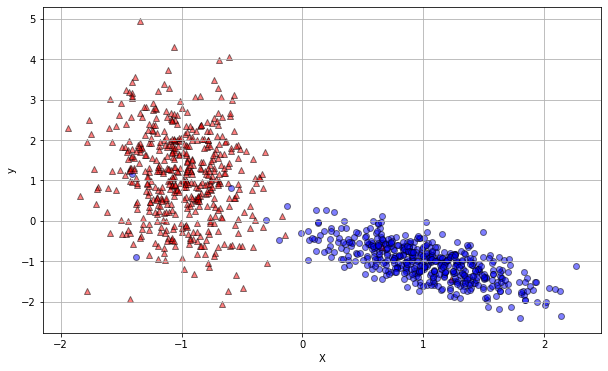

In [29]:
fig, ax = plt.subplots(1, 1, figsize = (10, 6))

ax.grid()
ax.set_xlabel("X")
ax.set_ylabel("y")

for i in range(samples):
    if y[i] == 0:
        ax.scatter(X[i, 0], X[i, 1], edgecolors = "k", alpha = 0.5, marker = "^", color = "r")
    else:
        ax.scatter(X[i, 0], X[i, 1], edgecolors = "k", alpha = 0.5, marker = "o", color = "b")
                   
plt.show()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

lr = LogisticRegression().fit(X_train, y_train)

print("train score : {:.3f}".format(lr.score(X_train, y_train)))
print("test score : {:.3f}".format(lr.score(X_test, y_test)))

train score : 0.927
test score : 0.930


In [30]:
cv_scores = cross_val_score(lr, X, y, scoring = "accuracy", cv = 10)
print("교차검증 평균 점수 : {:.3f}".format(cv_scores.mean()))

교차검증 평균 점수 : nan


In [31]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
species = pd.Series(iris.target, dtype = "category")
species = species.cat.rename_categories(iris.target_names)
iris_df["species"] = species

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2,
                                                    random_state = 1, stratify = iris.target)

lg = LogisticRegression(C = 50).fit(X_train, y_train)

print("train score : {:.3f}".format(lg.score(X_train, y_train)))
print("test score : {:.3f}".format(lg.score(X_test, y_test)))

train score : 0.983
test score : 1.000
